In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from sklearn.datasets import make_blobs

In [3]:
sns.color_palette("Blues", as_cmap=True)
# set color palette
sns.set_palette("Blues")

In [4]:
# load xkcd font
fm.fontManager.addfont('./plot_fonts/xkcd.otf')

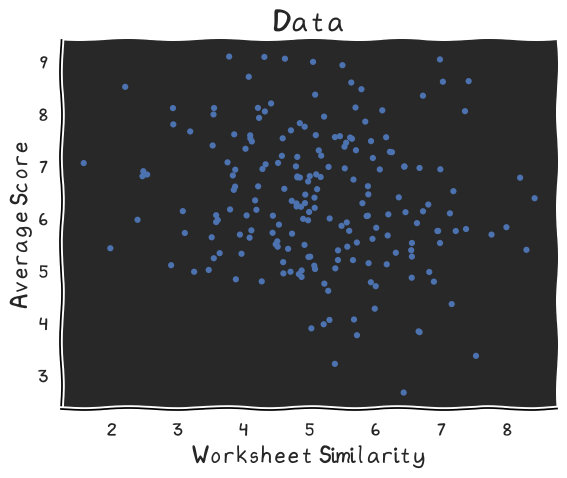

In [5]:
X, y = make_blobs(n_samples=200, centers=3, n_features=2, 
                  random_state=0,
                  center_box=(0, 10))

with plt.xkcd():
    sns.set_theme(rc={
        'axes.facecolor':'#282828',
        'figure.facecolor':'#282828',
        'axes.edgecolor':'black',
        'axes.grid':False,
        'font.family':'xkcd',
        'font.size':12,
        # remove spines top and right
        'axes.spines.top':False,
        'axes.spines.right':False,
    })
    fig, ax = plt.subplots(frameon=False)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], 
                    s=20,
                    edgecolor="none",
                    legend=False,
                    )
    plt.xlabel('Worksheet Similarity', fontsize=16)
    plt.ylabel('Average Score', fontsize=16)
    plt.title('Data', fontsize=20)
    plt.show()

In [6]:
random_student = X[np.random.choice(X.shape[0], 1, replace=False), :]

# calculate the euclidean distance between rabdom student and all other students
distances = np.sqrt(np.sum((X - random_student)**2, axis=1))
distances

array([1.34552369, 1.42962864, 1.8972392 , 0.98886812, 2.76622326,
       0.96655921, 2.41533078, 1.70797678, 1.89835906, 0.39883072,
       2.40203077, 0.54176336, 2.17504086, 1.43944644, 1.1526957 ,
       0.40041483, 2.60248305, 1.95949164, 0.67415443, 3.32937861,
       0.83591503, 1.66342942, 1.41643229, 2.20047328, 2.54120561,
       1.04867572, 2.98540541, 1.42229468, 1.67223568, 0.39785684,
       1.57293858, 3.06542916, 0.27457785, 0.71823132, 2.21480428,
       2.17052289, 2.27964424, 1.99305619, 3.14691325, 2.0527087 ,
       1.20372244, 0.86060071, 2.11604149, 1.76843664, 3.53112208,
       3.23065949, 1.18354109, 0.86203351, 3.03907184, 1.7828236 ,
       0.83677445, 1.71097659, 0.86897126, 2.68152288, 1.45522697,
       1.3400887 , 1.78008502, 2.52072633, 1.84570673, 3.91676194,
       1.80991747, 1.5464839 , 1.82872422, 1.30040999, 1.48165266,
       1.01160056, 0.54873794, 0.84008133, 1.26836418, 1.8737221 ,
       2.61733339, 2.14730789, 3.00417366, 0.98068526, 1.88185

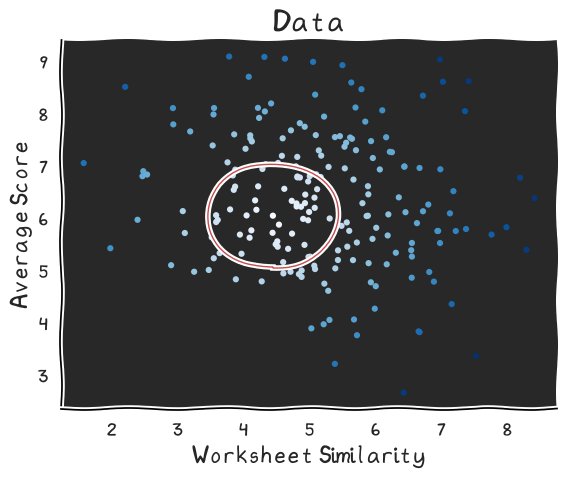

In [17]:
# plot again with the random distances as a hue
with plt.xkcd():
    sns.set_theme(rc={
        'axes.facecolor':'#282828',
        'figure.facecolor':'#282828',
        'axes.edgecolor':'black',
        'axes.grid':False,
        'font.family':'xkcd',
        'font.size':12,
        # remove spines top and right
        'axes.spines.top':False,
        'axes.spines.right':False,
    })
    fig, ax = plt.subplots(frameon=False)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=distances,
                    s=20,
                    edgecolor="none",
                    legend=False,
                    palette='Blues',
                    )
    plt.xlabel('Worksheet Similarity', fontsize=16)
    plt.ylabel('Average Score', fontsize=16)
    plt.title('Data', fontsize=20)
    # draw circle around random student
    # can replace 1 with distance of kth nearest neighbor
    circle = plt.Circle((random_student[0, 0], random_student[0, 1]), 1, color='r', fill=False)
    ax.add_artist(circle)
    plt.show()